In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("white")

df = pd.read_csv('extracted_features/pca_2000.csv', index_col=0)
columns = list(df.columns.values)
new_columns = columns.copy()
new_columns[-2] = 'subjectivity'
new_columns[-3] = 'polarity'
columns = dict(zip(columns, new_columns))
df = df.rename(index=str, columns=columns)

### Lists of features

In [7]:
all_features = list(df.columns.values)[:-1]
punc_features = ['all_punctuation', 'commas', 'periods', 'quotation_marks', 'question_marks', 'other_punctuations']
pos_features = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB', 'ADP', 'CCONJ', 'DET', 'NUM', 'PART', 'PRON']
ent_features = ['PERSON', 'NORP', 'ORG', 'GPE', 'LOC', 'DATE', 'CARDINAL']
sentiment_features = ['polarity', 'subjectivity']

In [8]:
print(df.columns.values)

['all_punctuation' 'commas' 'periods' 'quotation_marks' 'question_marks'
 'other_punctuations' 'ADJ' 'ADV' 'NOUN' 'PROPN' 'VERB' 'ADP' 'CCONJ'
 'DET' 'NUM' 'PART' 'PRON' 'PERSON' 'NORP' 'ORG' 'GPE' 'LOC' 'DATE'
 'CARDINAL' 'polarity' 'subjectivity' 'target']


### Standardize the data

In [9]:
def standardize(df, features):
    # get features
    x = df.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    # get target
    y = df.loc[:, ['target']].values
    
    return x, y

In [10]:
def pca_projection(x, y, n_components=3):
    if n_components == 3:
        columns = ['principal component 1', 'principal component 2', 'principal component 3']
    else:
        columns = ['principal component 1', 'principal component 2']
    pca = PCA(n_components=n_components)
    pc = pca.fit_transform(x)
    pc_df = pd.DataFrame(data=pc, 
                         columns=columns)
    pca_df = pd.concat([pc_df, pd.DataFrame(data=y, columns=['target'])], axis=1)
    return pca_df

In [11]:
def visualization_3D(df, feature_type):
    if feature_type == "all features":
        features = all_features
    elif feature_type == "punctuation features":
        features = punc_features
    elif feature_type == "parts of speech features":
        features = pos_features
    elif feature_type == "named entity features":
        features = ent_features
    else:
        raise ValueError
        
    x, y = standardize(df, features)
    pca_df = pca_projection(x, y)

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    pca_df_pos, pca_df_neg = pca_df[pca_df['target']==1], pca_df[pca_df['target']==0]

    ax.scatter(pca_df_pos['principal component 1'], 
               pca_df_pos['principal component 2'], 
               pca_df_pos['principal component 3'],
               c='r',
               cmap='Set2_r',
               marker='o',
               s=50)

    ax.scatter(pca_df_neg['principal component 1'], 
               pca_df_neg['principal component 2'], 
               pca_df_neg['principal component 3'],
               c='b',
               cmap='Set2_r',
               marker='^',
               s=50)

    xAxisLine = ((min(pca_df['principal component 1']), max(pca_df['principal component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'g')
    yAxisLine = ((0, 0), (min(pca_df['principal component 2']), max(pca_df['principal component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
    zAxisLine = ((0, 0), (0,0), (min(pca_df['principal component 3']), max(pca_df['principal component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'g')

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA with {}".format(feature_type))

In [13]:
def visualization_2D(df, feature_type):
    if feature_type == "sentiment features":
        columns = sentiment_features + ['target']
        print(columns)
        pca_df = df[columns]
        name_1 = 'polarity'
        name_2 = 'subjectivity'
        title = "Sentiment features scatter plot"
    else:
        if feature_type == "all features":
            features = all_features
        elif feature_type == "punctuation features":
            features = punc_features
        elif feature_type == "parts of speech features":
            features = pos_features
        elif feature_type == "named entity features":
            features = ent_features
        else:
            raise ValueError

        x, y = standardize(df, features)
        pca_df = pca_projection(x, y, n_components=2)
        name_1 = 'principal component 1'
        name_2 = 'principal component 2'
        title = "PCA with {}".format(feature_type)

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    pca_df_pos, pca_df_neg = pca_df[pca_df['target']==1], pca_df[pca_df['target']==0]

    ax.scatter(pca_df_pos[name_1], 
               pca_df_pos[name_2], 
               c='r',
               cmap='Set2_r',
               marker='o',
               label='insincere questions',
               s=50)

    ax.scatter(pca_df_neg[name_1], 
               pca_df_neg[name_2], 
               c='b',
               cmap='Set2_r',
               marker='^',
               label='sincere questions',
               s=50)

    xAxisLine = ((min(pca_df[name_1]), max(pca_df[name_1])), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], 'g')
    yAxisLine = ((0, 0), (min(pca_df[name_2]), max(pca_df[name_2])))
    ax.plot(yAxisLine[0], yAxisLine[1], 'g')
    
    ax.legend(fontsize=20)
    ax.set_xlabel(name_1, fontsize=20)
    ax.set_ylabel(name_2, fontsize=20)
    ax.set_title(title, fontsize=20)

### Visualize

#### 3D PCA visualization

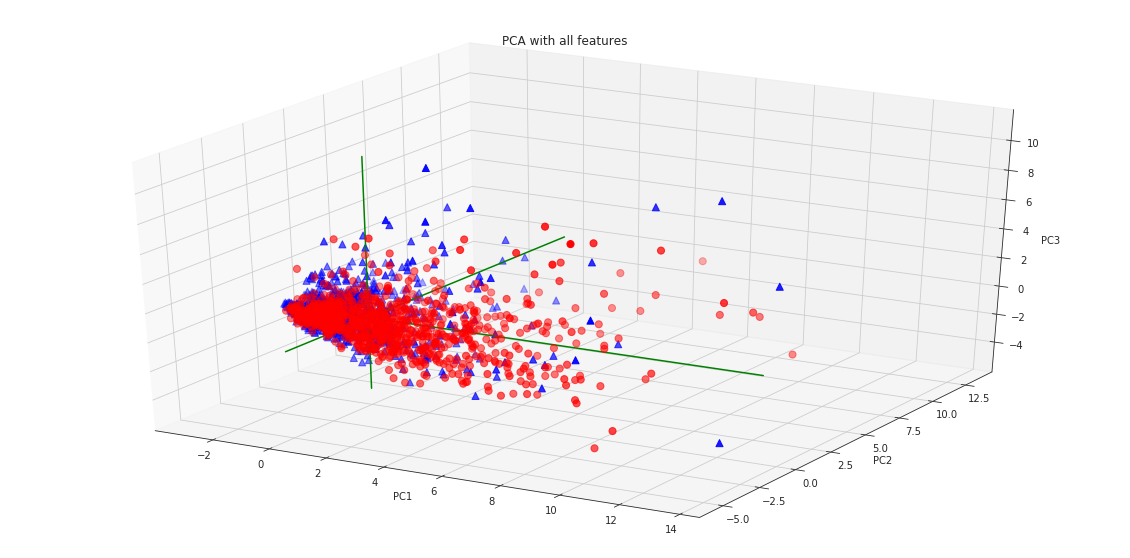

In [46]:
visualization_3D(df, "all features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


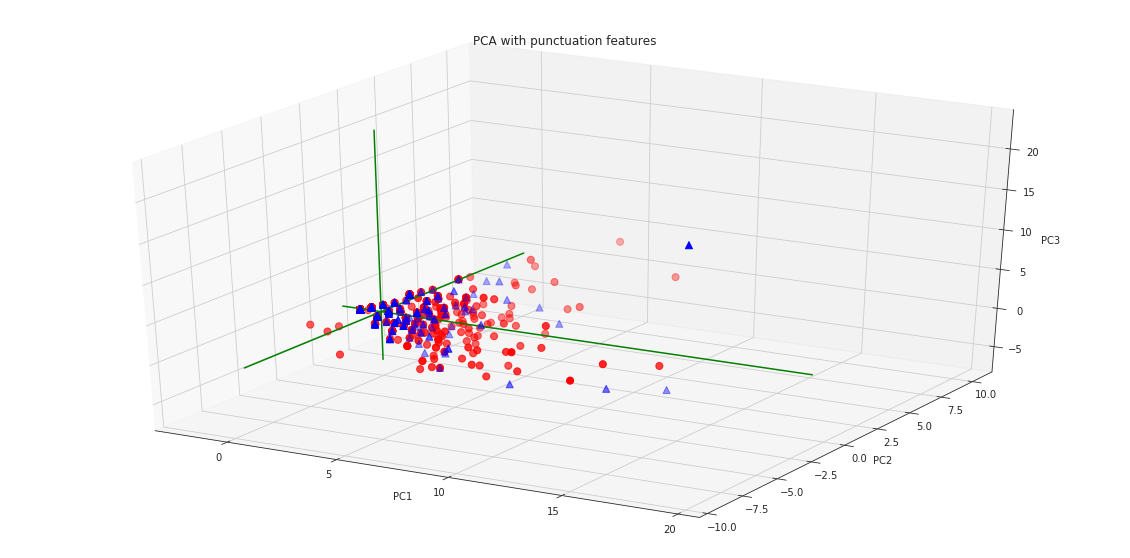

In [47]:
visualization_3D(df, "punctuation features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


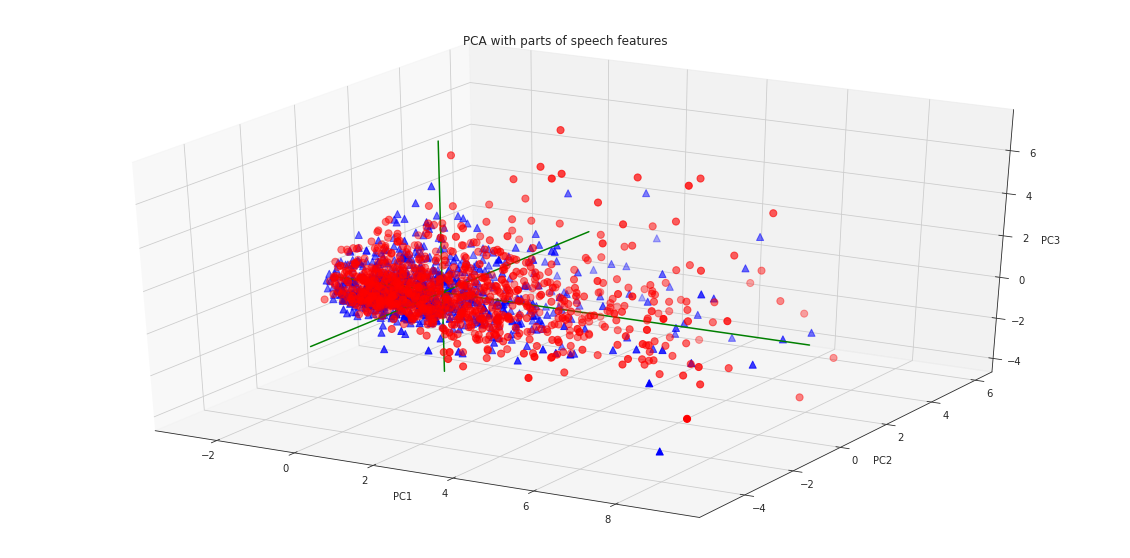

In [50]:
visualization_3D(df, "parts of speech features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


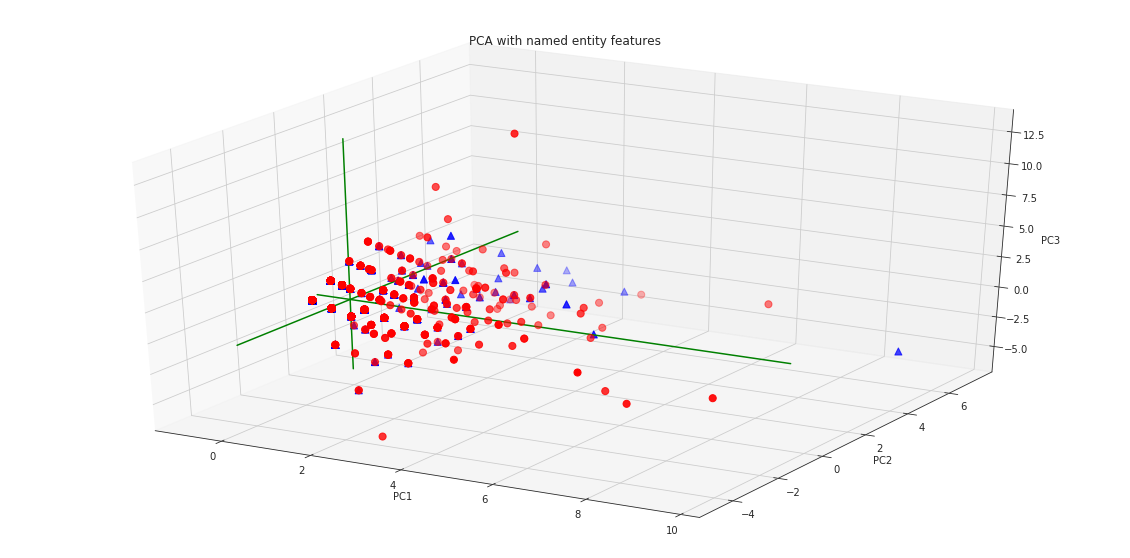

In [56]:
visualization_3D(df, "named entity features")

#### 2D Visualization

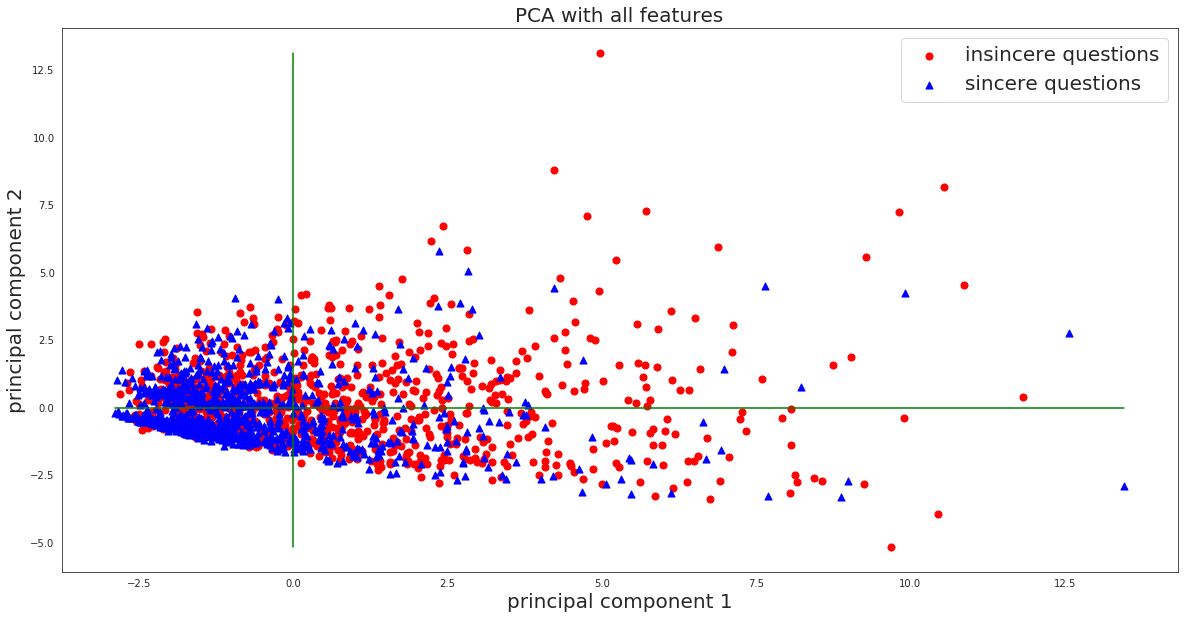

In [21]:
visualization_2D(df, "all features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


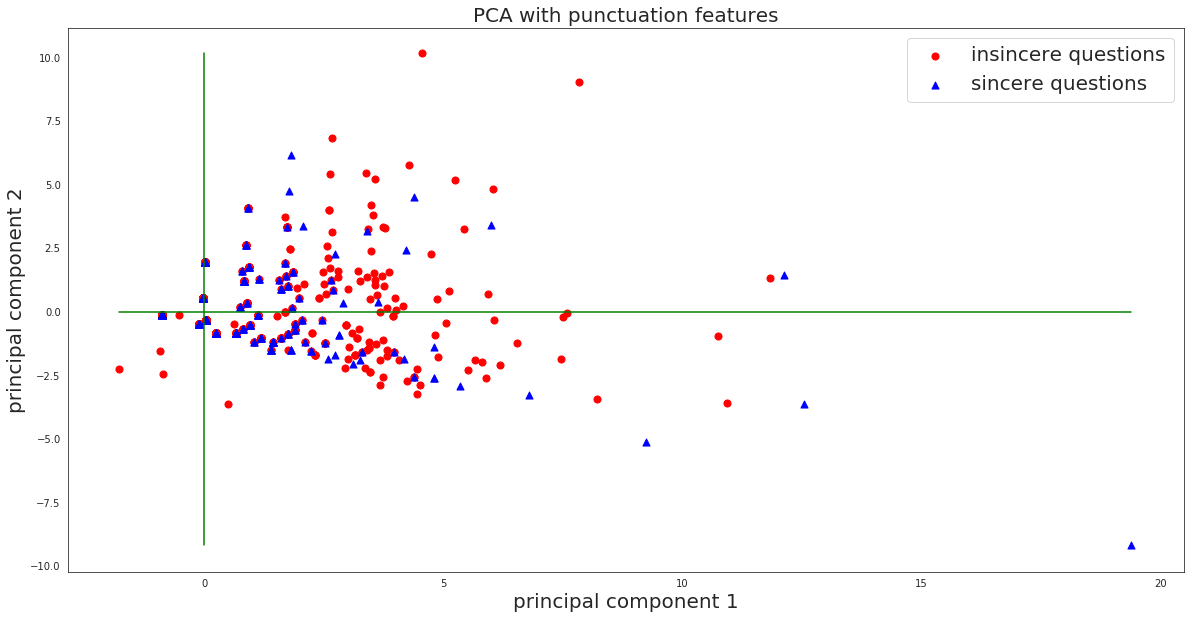

In [22]:
visualization_2D(df, "punctuation features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


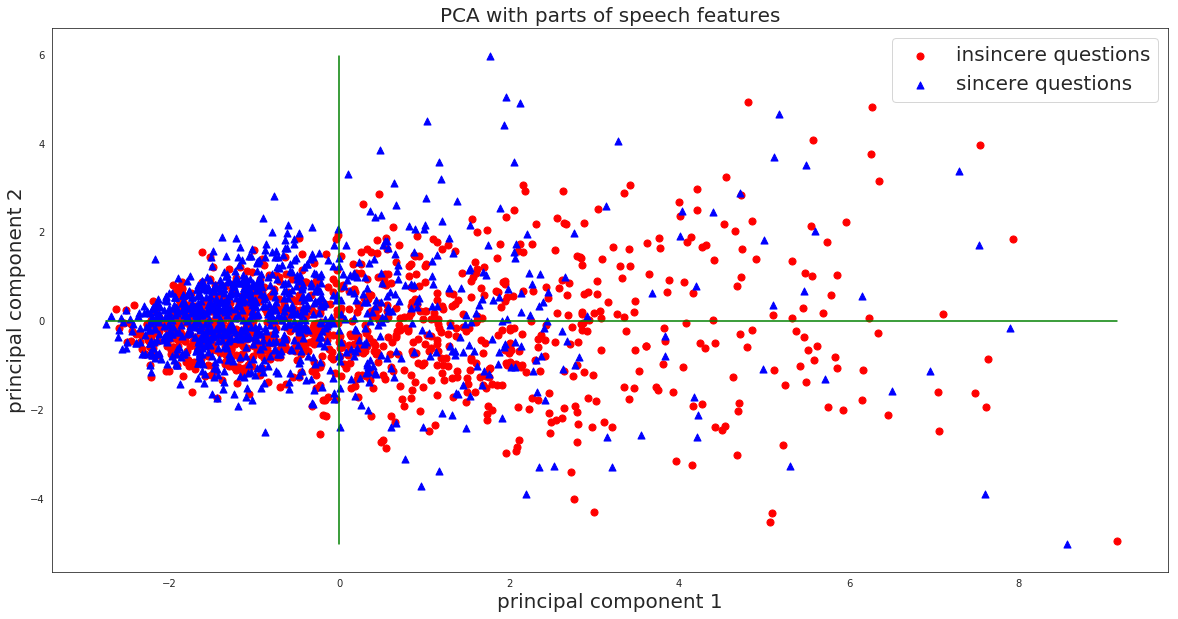

In [23]:
visualization_2D(df, "parts of speech features")

/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jinny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


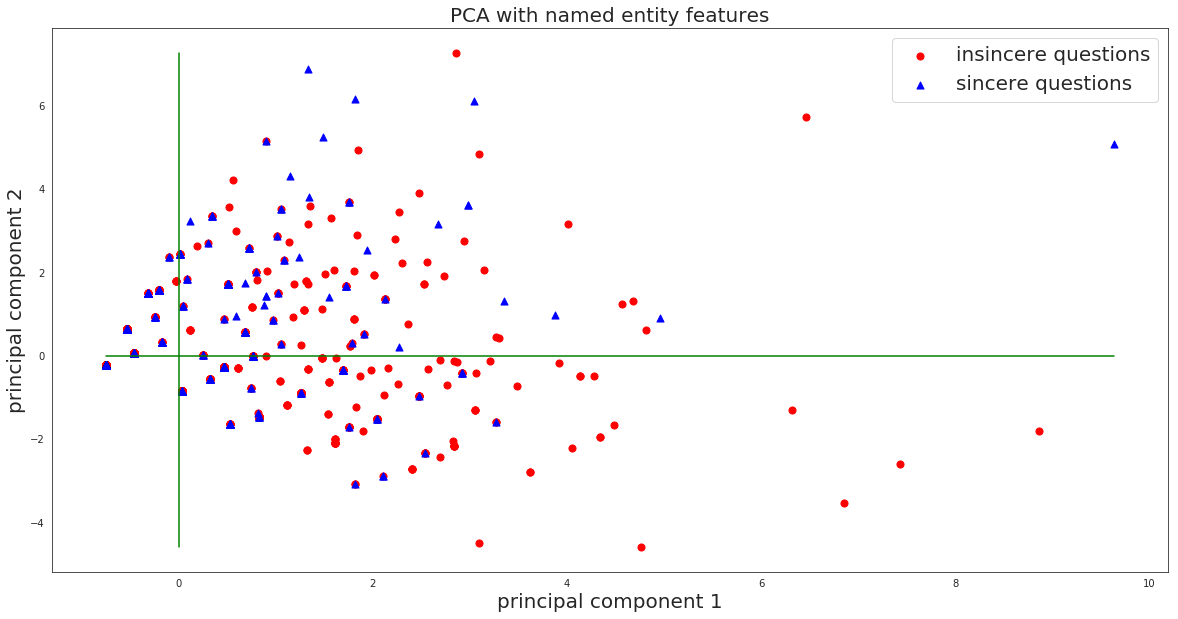

In [24]:
visualization_2D(df, "named entity features")

['polarity', 'subjectivity', 'target']


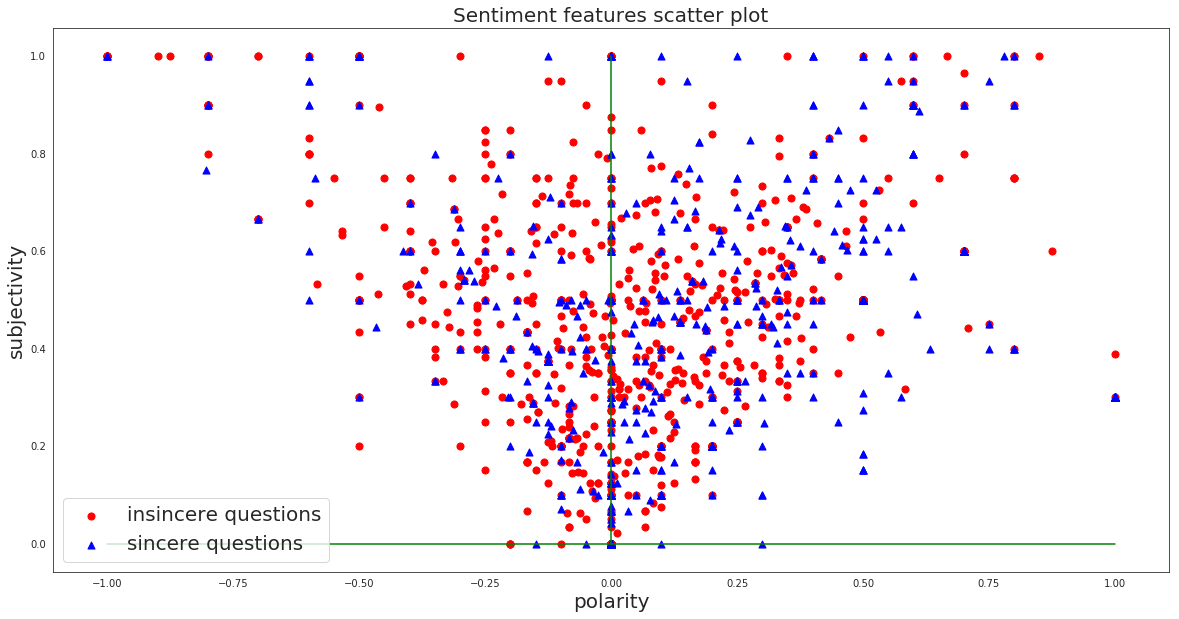

In [14]:
visualization_2D(df, "sentiment features")